In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import read_reports as rr
import Differentiated_Body_Composition_Tracker as dbct


sol_to_earth = 332946.078

--- 0.17787528038024902 seconds ---


In [2]:
anna_old_tt, anna_old_n = rr.extract_data_outfile('../../data/collision_reports/Anna.out')
anna_old_v, anna_old_b = rr.extract_data_impact('../../data/collision_reports/Anna.out')

anna_new_t, anna_new_ty = rr.extract_data_report('../../data/collision_reports/nov 18/anna_new_cr.txt')
anna_new_v, anna_new_b = rr.extract_data_impact('../../data/collision_reports/Anna.out')

1) Comparing Anna's output file with my results

ef = 5

min frag mass = 0.5 m_pl

Surface density profile exactly as Anna's

10 runs



In [3]:
# Define the base path and run numbers
base_path = '../../data/collision_reports/nov 26/'
run_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize lists to store results
tt_list = []
n_list = []
v_list = []
b_list = []

# Loop through run numbers
for run in run_numbers:
    tt, n = rr.extract_data_outfile_limited(f"{base_path}run{run}.out", 10e6)
    v, b = rr.extract_data_impact(f"{base_path}run{run}.out")
    tt_list.append(tt)
    n_list.append(n)
    v_list.append(v[:len(tt_list[run-1])])
    b_list.append(b[:len(tt_list[run-1])])


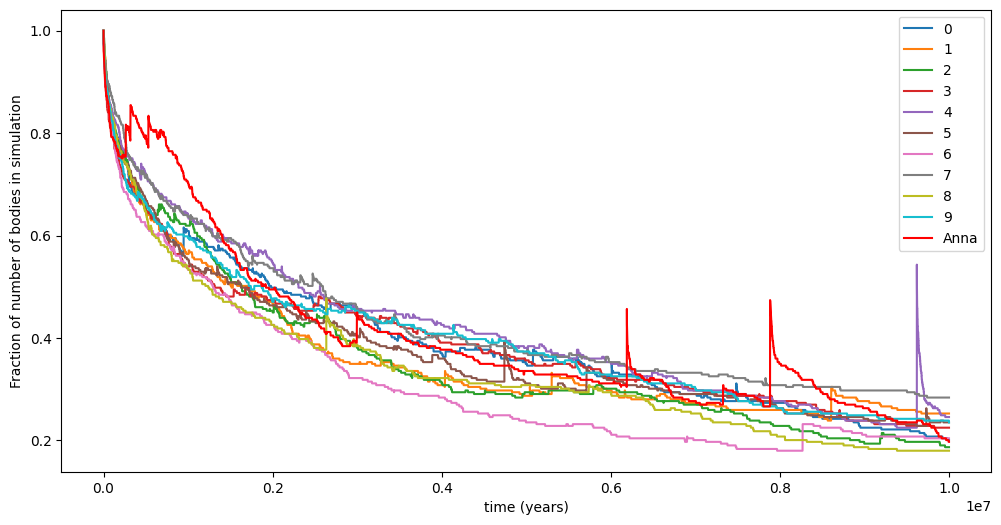

In [4]:
#Plots of number of bodies versus time, for alpha = 1.5
n_0 = 26+260+3 #embryos, pls, sun, saturn, jupiter

plt.figure(figsize=(12,6))
for i in range(0,10):
    plt.plot(n_list[i]['t'], n_list[i]['n_bodies']/n_0, label = i)


plt.plot(anna_old_n['t'], anna_old_n['n_bodies']/(anna_old_n['n_bodies'][0]), label = 'Anna', color = 'red')

#plt.xlim(0,10e6)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()
plt.show()

In [5]:
print(len(tt_list[2]))

539


<Figure size 640x480 with 0 Axes>

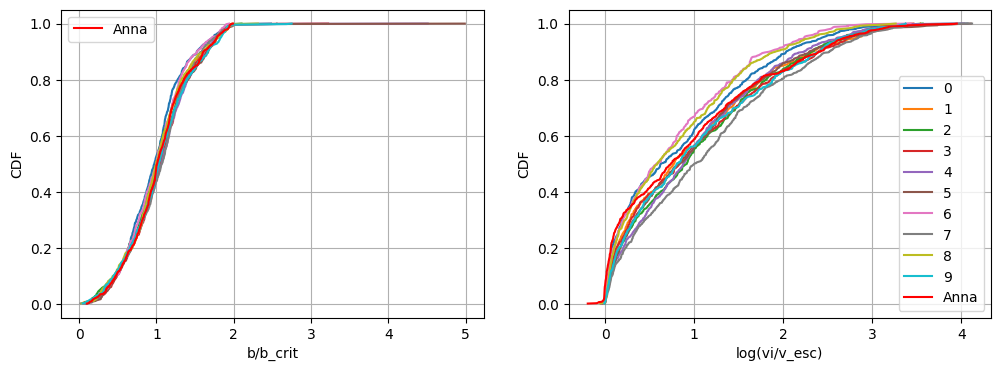

In [6]:
#CDF functions
plt.clf()
df_b = []
cdf_b = []
df_v = []
cdf_v = []
for i in range(0,10):
    v_cut = v_list[i]
    df_1, cdf_1 = rr.make_cdf(b_list[i])
    df_2, cdf_2 = rr.make_cdf(v_list[i])
    df_b.append(df_1)
    cdf_b.append(cdf_1)
    df_v.append(df_2)
    cdf_v.append(cdf_2)
    

anna_df_b, anna_cdf_b = rr.make_cdf(anna_old_b)
anna_df_v, anna_cdf_v = rr.make_cdf(anna_old_v)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
for i in range(0,10):
    plt.plot(df_b[i], cdf_b[i])
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

for i in range(0,10):
    plt.plot(np.log(df_v[i]), cdf_v[i], label=i)

plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

<Figure size 640x480 with 0 Axes>

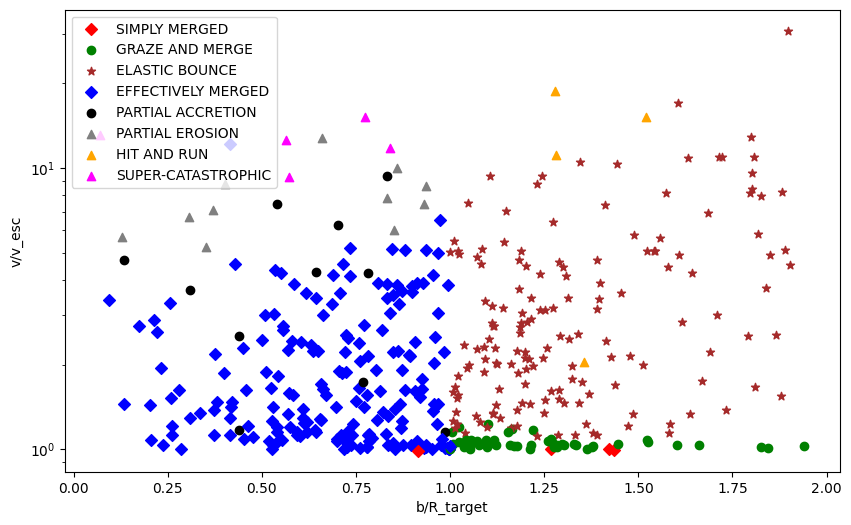

<Figure size 640x480 with 0 Axes>

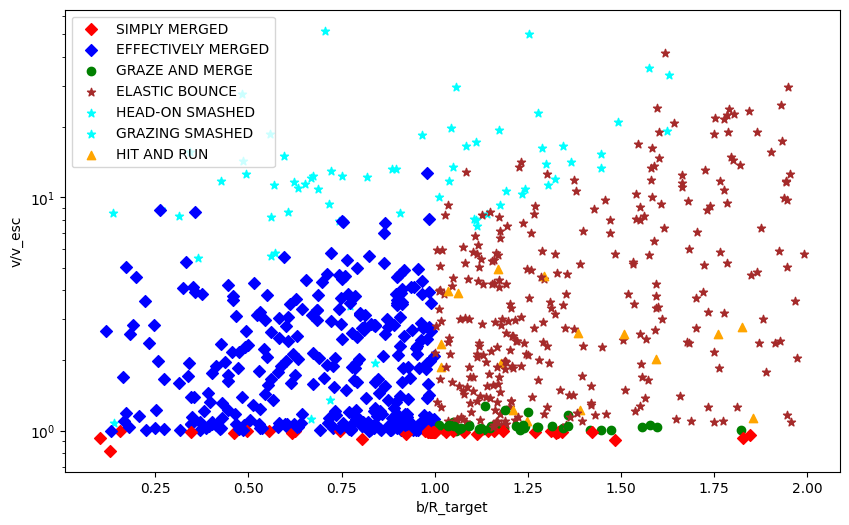

In [7]:
run_num = 6
rr.plot_b_v(b_list[run_num], v_list[run_num], tt_list[run_num]['coll_types'])
rr.plot_b_v(anna_old_b, anna_old_v, anna_old_tt['coll_types'])

Chambers

K-S stats

In [39]:
#vi/vesc
data1 = v_list[1]
data2 = v_list[6]
#data2 = np.concatenate(v_list, axis=0)

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.11837111039495829
P-value: 0.002454659166760643
Conclusion: Reject H0: The datasets are significantly different.


In [9]:
#b/bcrit
data1 = anna_old_b
data2 = np.concatenate(b_list, axis=0)
# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.025767617061922907
P-value: 0.7357808858220916
Conclusion: Fail to reject H0: No significant difference in the datasets.


2. Comparing chambers results

In [10]:
# Define the base path and run numbers
base_path = '../../data/collision_reports/nov 26/'
run_numbers = [1,2,3,4,5,6,7,8,9,10]
#run_numbers = [1,4]

# Initialize lists to store results
tt_cham = []
n_cham = []
v_cham = []
b_cham = []

# Loop through run numbers
for run in run_numbers:
    tt, n = rr.extract_data_outfile(f"{base_path}cham{run}.out")
    v, b = rr.extract_data_impact(f"{base_path}cham{run}.out")
    tt_cham.append(tt)
    n_cham.append(n)
    v_cham.append(v)
    b_cham.append(b)

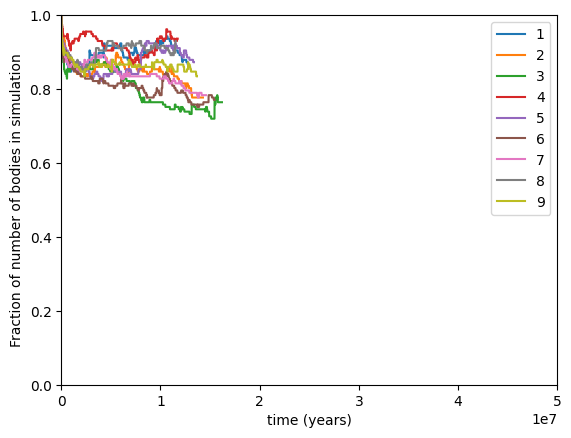

In [11]:
#Plots of number of bodies versus time, for alpha = 1.5
n_0 = 14+140+3 #embryos, pls, sun, saturn, jupiter

for i in range(1,run_numbers[-1]):
    plt.plot(n_cham[i]['t'], n_cham[i]['n_bodies']/n_0, label = i)


#plt.plot(anna_old_n['t'], anna_old_n['n_bodies']/(anna_old_n['n_bodies'][0]), label = 'Anna', color = 'red')
plt.xlim(0,50e6)
plt.ylim(0,1)
plt.xlabel('time (years)')
plt.ylabel('Fraction of number of bodies in simulation')

plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

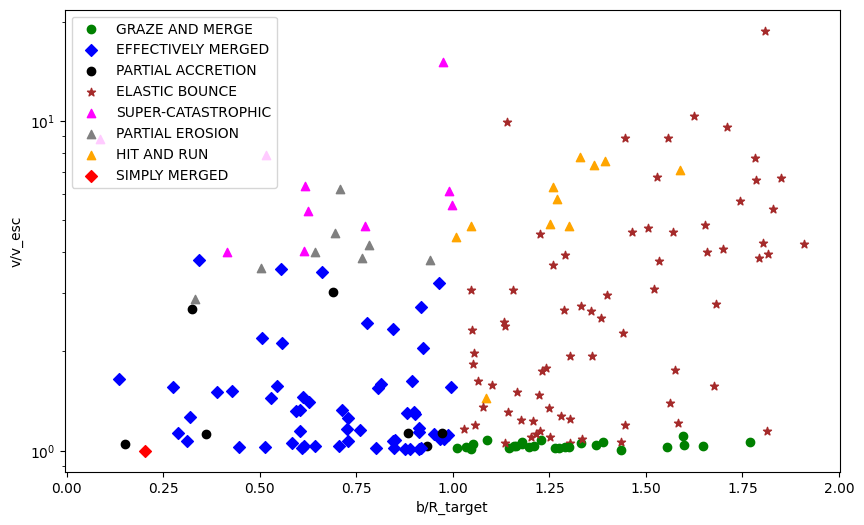

In [12]:
num = 0
rr.plot_b_v(b_cham[num], v_cham[num], tt_cham[num]['coll_types'])

<Figure size 640x480 with 0 Axes>

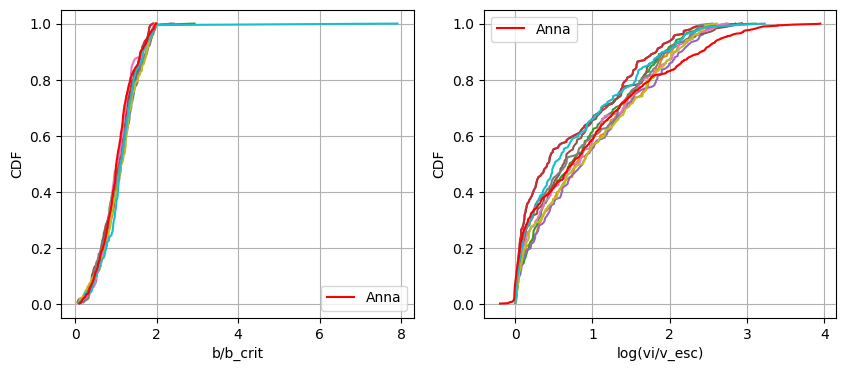

In [13]:
#CDF functions
plt.clf()
dfcham_b = []
cdfcham_b = []
dfcham_v = []
cdfcham_v = []
for i in range(0,10):
    dfcham_1, cdfcham_1 = rr.make_cdf(b_cham[i])
    dfcham_2, cdfcham_2 = rr.make_cdf(v_cham[i])
    dfcham_b.append(dfcham_1)
    cdfcham_b.append(cdfcham_1)
    dfcham_v.append(dfcham_2)
    cdfcham_v.append(cdfcham_2)
    

anna_df_b, anna_cdf_b = rr.make_cdf(anna_old_b)
anna_df_v, anna_cdf_v = rr.make_cdf(anna_old_v)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
for i in range(0,10):
    plt.plot(dfcham_b[i], cdfcham_b[i])
plt.plot(anna_df_b, anna_cdf_b, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('b/b_crit')
plt.ylabel('CDF')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot

for i in range(0,10):
    plt.plot(np.log(dfcham_v[i]), cdfcham_v[i])

plt.plot(np.log(anna_df_v), anna_cdf_v, label = 'Anna', color='red')
plt.grid(True)
plt.xlabel('log(vi/v_esc)')
plt.ylabel('CDF')
plt.legend()


plt.show()

In [14]:
#vi/vesc
data1 = anna_old_v
data2 = v_cham[6]
#data2 = np.concatenate(v_list, axis=0)

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.07639705096698365
P-value: 0.3125937361361888
Conclusion: Fail to reject H0: No significant difference in the datasets.


In [15]:
#vi/vesc
data1 = anna_old_v
#data2 = v_cham[6]
data2 = np.concatenate(v_cham, axis=0)

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.0812298603651987
P-value: 0.001289032000561352
Conclusion: Reject H0: The datasets are significantly different.


In [16]:
#vi/vesc
data1 = anna_old_b
#data2 = b_cham[6]
data2 = np.concatenate(b_cham, axis=0)

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.11405746509129967
P-value: 1.0425798503194883e-06
Conclusion: Reject H0: The datasets are significantly different.


In [17]:
v_clean = []  # Initialize an empty list to store cleaned data

for i in range(10):
    clean_data = rr.remove_outliers_iqr(v_list[i])  # Clean data for the current array
    v_clean.append(clean_data)

In [18]:
type(v_clean)

list

In [19]:
#vi/vesc
data1 = anna_old_v
#data2 = b_cham[6]
#data2 = np.concatenate(v_clean, axis=0)
data2 = np.concatenate(v_list, axis=0)

# Call the function
result = rr.perform_ks_test(data1, data2)

# Display the result
print("K-S Statistic:", result["statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

K-S Statistic: 0.09089973432755084
P-value: 1.96139638632616e-05
Conclusion: Reject H0: The datasets are significantly different.


Other files

In [21]:
anna_11_12_t, anna_11_12_type = rr.extract_data_report('../../data/collision_reports/nov 26/11_21_frag.txt')

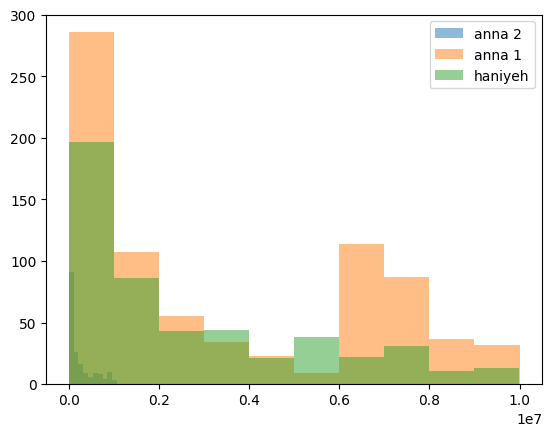

In [37]:
plt.hist(anna_11_12_t, label = 'anna 2', alpha=0.5)
plt.hist(anna_old_tt['coll_times'], label = 'anna 1', alpha=0.5)
plt.hist(tt_new, label = 'haniyeh', alpha=0.5)

plt.legend()
plt.show()

In [36]:
tt_new = tt_list[0]['coll_times']
tt_new = tt_new[tt_new < 10e6]